# Intro to Regression

 - Launch your jupyter notebooks! 
 - We're going through a few regression exercises that will help you see how regression works in Python.

<img src="imgs/regression_ml.png" />

 

## Objectives: 
At the end of this notebook the students should:
- Be able to visualize data
- Look for correlations and multicollinearity
- Understand how linear regression models work
- Interpret basic regression statistics like R^2
- Do basic feature engineering and selection to improve models


Be able to create linear regression in:
- [***statsmodels***](http://statsmodels.sourceforge.net/): a package mainly best at doing regressions with traditional R formula syntax
- [***scikit-learn***](http://scikit-learn.org/dev/index.html): This is the main machine learning package we'll be using throughout the course.  It has a multitude of machine learning algorithms and helpful machine learning pipeline tools.  sklearn has a tremendous amount of functionality, to get the most out of this course it will help to really explore the depth of the documentation on your own and watch as you understand more and more of the functionality as the course progresses.


Gain familiarity with the following:
- [***seaborn***](http://stanford.edu/~mwaskom/software/seaborn/): We'll use seaborn for **visualization** as we go along
- [***Variable Preprocessing***](http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing) with scikit-learn:  We'll be **"standardizing"** many of our variables to yield better model data.  We'll show how the "linear" models can be extended to basically any type of function by using functions of the different fields as the inputs to the linear model.

Gain familiarity with the Iterative Approach to model design!  

## Data
We'll take a look at: [Car price predictor dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset)    
[subset of data here](https://github.com/julialintern/intro_to_machine_learning/tree/main/data)

# Setup
Try running the following imports and check that they all import successfully.  If they do not, install commands are given below. If necessary, at a command line window use `pip` to install the ones that are failing for you and then retry the imports.

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

import datetime as dt
pd.options.display.max_columns = 500

import warnings
warnings.filterwarnings('ignore')

## Installations (if necessary)

```` bash
conda install pandas numpy statsmodels seaborn scikit-learn
````

# Used Car Data
We will be working with US Used Car in order to predict **price** (!)
and to demonstrate a few basic features of ***statsmodels*** and ***seaborn*** and how they might be used in a data science workflow for regression.

The dataset includes numerous predictive features we can use to predict Used car prices.

Let's load the dataset in using ***pandas*** and take a look at it.

 <img src="imgs/saab.png" />

In [2]:
# Load data  
df=pd.read_csv('data/data_small_final.csv',index_col=0)

In [3]:
df.head()

,vin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,fuel_type,has_accidents,highway_fuel_economy,horsepower,is_new,is_oemcpo,latitude,length,listed_date,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,torque,transmission,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
1295044,1GAZG1FGXF1182508,11.0,33,68005,V8 Flex Fuel Vehicle,6000.0,V8 Flex Fuel Vehicle,True,Nissan,Flex Fuel Vehicle,False,16.0,342.0,False,NaN,41.1836,244.1 in,2020-08-08,-95.9359,Chevrolet,15 seats,44491.0,Express,2.0,"342 hp @ 5,400 RPM",20785.0,False,1938,4.750000,"373 lb-ft @ 4,400 RPM",A,NaN,RWD,Rear-Wheel Drive,155 in,79.2 in,2015
659921,JTJBM7FX0J5202882,15.0,7,44312,V8,4600.0,V8,True,Lexus,Gasoline,False,18.0,301.0,False,True,40.9790,192.1 in,2020-09-03,-81.4877,Lexus,7 seats,21487.0,GX,1.0,"301 hp @ 5,500 RPM",46995.0,False,250,4.500000,"329 lb-ft @ 3,500 RPM",A,NaN,AWD,All-Wheel Drive,109.8 in,74.2 in,2018
1097916,1FM5K8HC3LGA01518,18.0,369,30143,V6,3000.0,V6,True,Ford,Gasoline,NaN,24.0,365.0,True,NaN,34.4493,198.8 in,2019-09-07,-84.4483,Ford,7 seats,90.0,Explorer,NaN,NaN,52306.0,NaN,0,4.205882,NaN,A,NaN,AWD,All-Wheel Drive,119.1 in,89.3 in,2020
228002,YV4BR0DL3M1675891,NaN,12,6108,I4,2000.0,I4,True,Volvo,Gasoline,NaN,NaN,400.0,True,NaN,41.7701,184.6 in,2020-08-28,-72.6558,Volvo,5 seats,13.0,XC60,NaN,"400 hp @ 6,000 RPM",67625.0,NaN,0,4.578947,"472 lb-ft @ 2,200 RPM",A,NaN,AWD,All-Wheel Drive,112.8 in,83.3 in,2021
955081,JM3KFBEY5K0697516,22.0,8,25701,I4,2500.0,I4,True,Jeep,Gasoline,False,27.0,250.0,False,NaN,38.3950,179.1 in,2020-09-02,-82.4155,Mazda,5 seats,12437.0,CX-5,1.0,"250 hp @ 5,000 RPM",32985.0,False,877,4.625000,"310 lb-ft @ 2,000 RPM",A,NaN,AWD,All-Wheel Drive,106.2 in,83.3 in,2019


In [4]:
df.shape

(225000, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 1295044 to 213979
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      225000 non-null  object 
 1   city_fuel_economy        188128 non-null  float64
 2   daysonmarket             225000 non-null  int64  
 3   dealer_zip               225000 non-null  object 
 4   engine_cylinders         217552 non-null  object 
 5   engine_displacement      212120 non-null  float64
 6   engine_type              217552 non-null  object 
 7   franchise_dealer         225000 non-null  bool   
 8   franchise_make           182141 non-null  object 
 9   fuel_type                218846 non-null  object 
 10  has_accidents            118023 non-null  object 
 11  highway_fuel_economy     188128 non-null  float64
 12  horsepower               212120 non-null  float64
 13  is_new                   225000 non-null  bool   
 14

In [6]:
df.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,vehicle_damage_category,year
count,188128.000000,225000.000000,212120.000000,188128.000000,212120.000000,225000.000000,225000.000000,2.140020e+05,111402.000000,2.250000e+05,225000.000000,222014.000000,0.0,225000.000000
mean,22.711000,75.668382,2966.873468,29.487057,247.763455,36.979490,-90.666080,3.121943e+04,1.533375,2.989133e+04,551.637662,4.270687,NaN,2017.734876
std,8.798542,109.152262,1350.378436,7.769239,90.281676,4.986773,13.907174,4.556432e+04,0.925868,1.970399e+04,1063.528282,0.512163,NaN,4.129016
min,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,4.840000e+02,0.000000,1.000000,NaN,1927.000000
25%,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,1.843800e+04,0.000000,4.000000,NaN,2017.000000
50%,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,2.639500e+04,0.000000,4.337838,NaN,2020.000000
75%,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374875e+04,2.000000,3.811700e+04,785.000000,4.600000,NaN,2020.000000
max,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,2.698500e+06,68745.000000,5.000000,NaN,2021.000000


In [7]:
df.describe(include='object')

,vin,dealer_zip,engine_cylinders,engine_type,franchise_make,fuel_type,has_accidents,is_oemcpo,length,listed_date,make_name,maximum_seating,model_name,power,salvage,torque,transmission,wheel_system,wheel_system_display,wheelbase,width
count,225000,225000,217552,217552,182141,218846,118023,10104,213158,225000,225000,213158,225000,188747,118023,186101,220115,214020,214020,213158,213158
unique,224999,13753,31,31,48,7,2,1,758,1054,69,12,1032,1570,2,1538,4,5,5,440,271
top,2T3F1RFV7KW018380,77477,I4,I4,Ford,Gasoline,False,True,231.9 in,2020-09-03,Ford,5 seats,F-150,"355 hp @ 5,600 RPM",False,"383 lb-ft @ 4,100 RPM",A,FWD,Front-Wheel Drive,106.3 in,72.4 in
freq,2,326,106515,106515,29606,194850,99570,10104,7248,5813,35603,140688,9519,6627,117204,6627,181323,94894,94894,14564,10045


### Step # 1 )  Basic Data Cleaning

In [8]:
df.vin.value_counts().head()

2T3F1RFV7KW018380    2
1GAZG1FGXF1182508    1
2HKRW2H94LH648954    1
5UX2V1C03L9B97629    1
1J4GW48N54C357340    1
Name: vin, dtype: int64

In [9]:
df=df.drop_duplicates()
len(df)

224999

In [10]:
df.set_index('vin',inplace=True)

In [11]:
df.head()

,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,fuel_type,has_accidents,highway_fuel_economy,horsepower,is_new,is_oemcpo,latitude,length,listed_date,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,torque,transmission,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,11.0,33,68005,V8 Flex Fuel Vehicle,6000.0,V8 Flex Fuel Vehicle,True,Nissan,Flex Fuel Vehicle,False,16.0,342.0,False,NaN,41.1836,244.1 in,2020-08-08,-95.9359,Chevrolet,15 seats,44491.0,Express,2.0,"342 hp @ 5,400 RPM",20785.0,False,1938,4.750000,"373 lb-ft @ 4,400 RPM",A,NaN,RWD,Rear-Wheel Drive,155 in,79.2 in,2015
JTJBM7FX0J5202882,15.0,7,44312,V8,4600.0,V8,True,Lexus,Gasoline,False,18.0,301.0,False,True,40.9790,192.1 in,2020-09-03,-81.4877,Lexus,7 seats,21487.0,GX,1.0,"301 hp @ 5,500 RPM",46995.0,False,250,4.500000,"329 lb-ft @ 3,500 RPM",A,NaN,AWD,All-Wheel Drive,109.8 in,74.2 in,2018
1FM5K8HC3LGA01518,18.0,369,30143,V6,3000.0,V6,True,Ford,Gasoline,NaN,24.0,365.0,True,NaN,34.4493,198.8 in,2019-09-07,-84.4483,Ford,7 seats,90.0,Explorer,NaN,NaN,52306.0,NaN,0,4.205882,NaN,A,NaN,AWD,All-Wheel Drive,119.1 in,89.3 in,2020
YV4BR0DL3M1675891,NaN,12,6108,I4,2000.0,I4,True,Volvo,Gasoline,NaN,NaN,400.0,True,NaN,41.7701,184.6 in,2020-08-28,-72.6558,Volvo,5 seats,13.0,XC60,NaN,"400 hp @ 6,000 RPM",67625.0,NaN,0,4.578947,"472 lb-ft @ 2,200 RPM",A,NaN,AWD,All-Wheel Drive,112.8 in,83.3 in,2021
JM3KFBEY5K0697516,22.0,8,25701,I4,2500.0,I4,True,Jeep,Gasoline,False,27.0,250.0,False,NaN,38.3950,179.1 in,2020-09-02,-82.4155,Mazda,5 seats,12437.0,CX-5,1.0,"250 hp @ 5,000 RPM",32985.0,False,877,4.625000,"310 lb-ft @ 2,000 RPM",A,NaN,AWD,All-Wheel Drive,106.2 in,83.3 in,2019


### Step # 2 ) Drop object columns, 'id'  column (for now) 

In [12]:
## Let's start off by only using numerical vals 
num_cols=df.dtypes[df.dtypes!='object'].index
df_num=df[num_cols]

for i in df_num.columns:
    print(i)

city_fuel_economy
daysonmarket
engine_displacement
franchise_dealer
highway_fuel_economy
horsepower
is_new
latitude
longitude
mileage
owner_count
price
savings_amount
seller_rating
vehicle_damage_category
year


In [13]:
df_num.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,vehicle_damage_category,year
count,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000,2.249990e+05,224999.000000,222013.000000,0.0,224999.000000
mean,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370,2.989135e+04,551.636745,4.270686,NaN,2017.734870
std,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871,1.970403e+04,1063.530557,0.512164,NaN,4.129025
min,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,4.840000e+02,0.000000,1.000000,NaN,1927.000000
25%,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,1.843800e+04,0.000000,4.000000,NaN,2017.000000
50%,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,2.639500e+04,0.000000,4.337838,NaN,2020.000000
75%,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000,3.811700e+04,785.000000,4.600000,NaN,2020.000000
max,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,2.698500e+06,68745.000000,5.000000,NaN,2021.000000


In [14]:
df_num=df_num.drop(columns='vehicle_damage_category',axis=1)

In [15]:
df_num.head()

,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,year
vin,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,11.0,33,6000.0,True,16.0,342.0,False,41.1836,-95.9359,44491.0,2.0,20785.0,1938,4.750000,2015
JTJBM7FX0J5202882,15.0,7,4600.0,True,18.0,301.0,False,40.9790,-81.4877,21487.0,1.0,46995.0,250,4.500000,2018
1FM5K8HC3LGA01518,18.0,369,3000.0,True,24.0,365.0,True,34.4493,-84.4483,90.0,NaN,52306.0,0,4.205882,2020
YV4BR0DL3M1675891,NaN,12,2000.0,True,NaN,400.0,True,41.7701,-72.6558,13.0,NaN,67625.0,0,4.578947,2021
JM3KFBEY5K0697516,22.0,8,2500.0,True,27.0,250.0,False,38.3950,-82.4155,12437.0,1.0,32985.0,877,4.625000,2019


In [16]:
# Do some shifting, so that price is all the way to the left
new_col_list=list(df_num.columns[-4:])
new_col_list.extend(df_num.columns[:-4])

# How many rows and columns does the dataset have?
df_num=df_num[new_col_list]

In [17]:
pd.set_option('display.max_columns', 500)

df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


### Step #3 : Perform Initial EDA

### Without EDA we are .. 

<img src="imgs/flying_blind.png" />


Remember that without conducting a proper EDA we are flying blind.   
Be curious about your data!    
What are the distributions? 

### Visualizing with Seaborn
We see that we have 14 predictive features along with our response variable of price.
What are the correlations between the predictive features & price? 

#### Let's make a nice plot of our Response variable .. 

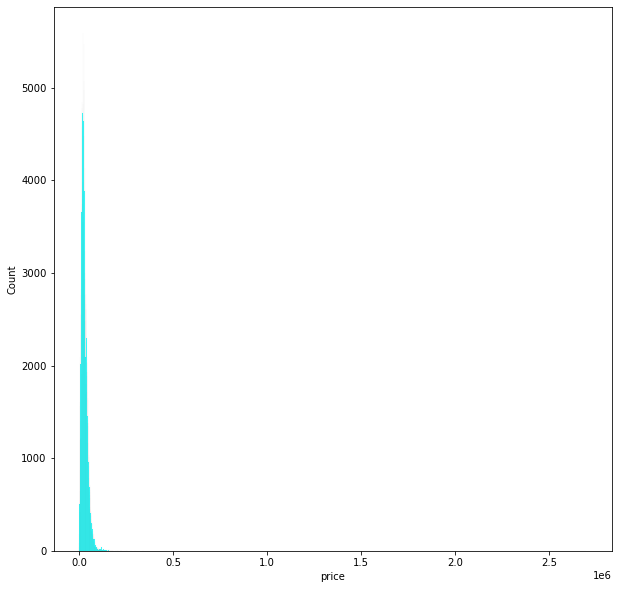

In [18]:
# note the dramatic right hand skew!
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df_num.price,color='cyan');

In [19]:
# View the correlations
df_num.corr()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count
price,1.000000,-0.003585,0.066876,0.359798,-0.171204,0.060551,0.366938,0.280687,-0.246068,0.586959,0.374732,-0.023490,-0.026367,-0.443932,-0.219786
savings_amount,-0.003585,1.000000,0.011980,-0.193109,-0.101944,-0.076525,0.139258,-0.211935,-0.095937,0.159770,-0.508199,-0.005055,-0.008541,0.247206,-0.071019
seller_rating,0.066876,0.011980,1.000000,-0.047229,-0.039744,-0.001001,0.031126,-0.037507,-0.050312,0.062569,-0.038027,0.092201,0.005155,0.036295,0.006693
year,0.359798,-0.193109,-0.047229,1.000000,0.156295,0.000406,-0.139161,0.496485,0.146759,0.029604,0.558924,-0.068497,-0.015741,-0.776629,-0.587181
city_fuel_economy,-0.171204,-0.101944,-0.039744,0.156295,1.000000,0.007042,-0.663647,0.059543,0.940855,-0.670930,0.100059,-0.039071,-0.085009,-0.151234,-0.126135
daysonmarket,0.060551,-0.076525,-0.001001,0.000406,0.007042,1.000000,-0.045479,0.003756,-0.001583,-0.020608,0.172803,0.020843,0.013578,-0.084527,0.097073
engine_displacement,0.366938,0.139258,0.031126,-0.139161,-0.663647,-0.045479,1.000000,-0.061573,-0.692354,0.831082,-0.067601,-0.006648,-0.008744,0.151741,0.118825
franchise_dealer,0.280687,-0.211935,-0.037507,0.496485,0.059543,0.003756,-0.061573,1.000000,0.043062,0.024797,0.471030,0.003389,0.014670,-0.517789,-0.265533
highway_fuel_economy,-0.246068,-0.095937,-0.050312,0.146759,0.940855,-0.001583,-0.692354,0.043062,1.000000,-0.703269,0.058137,-0.062287,-0.081188,-0.138088,-0.124240
horsepower,0.586959,0.159770,0.062569,0.029604,-0.670930,-0.020608,0.831082,0.024797,-0.703269,1.000000,0.008001,-0.013644,-0.012295,-0.013889,-0.000879


In [20]:
# Variables to keep an eye on? 

#### Correlation Map

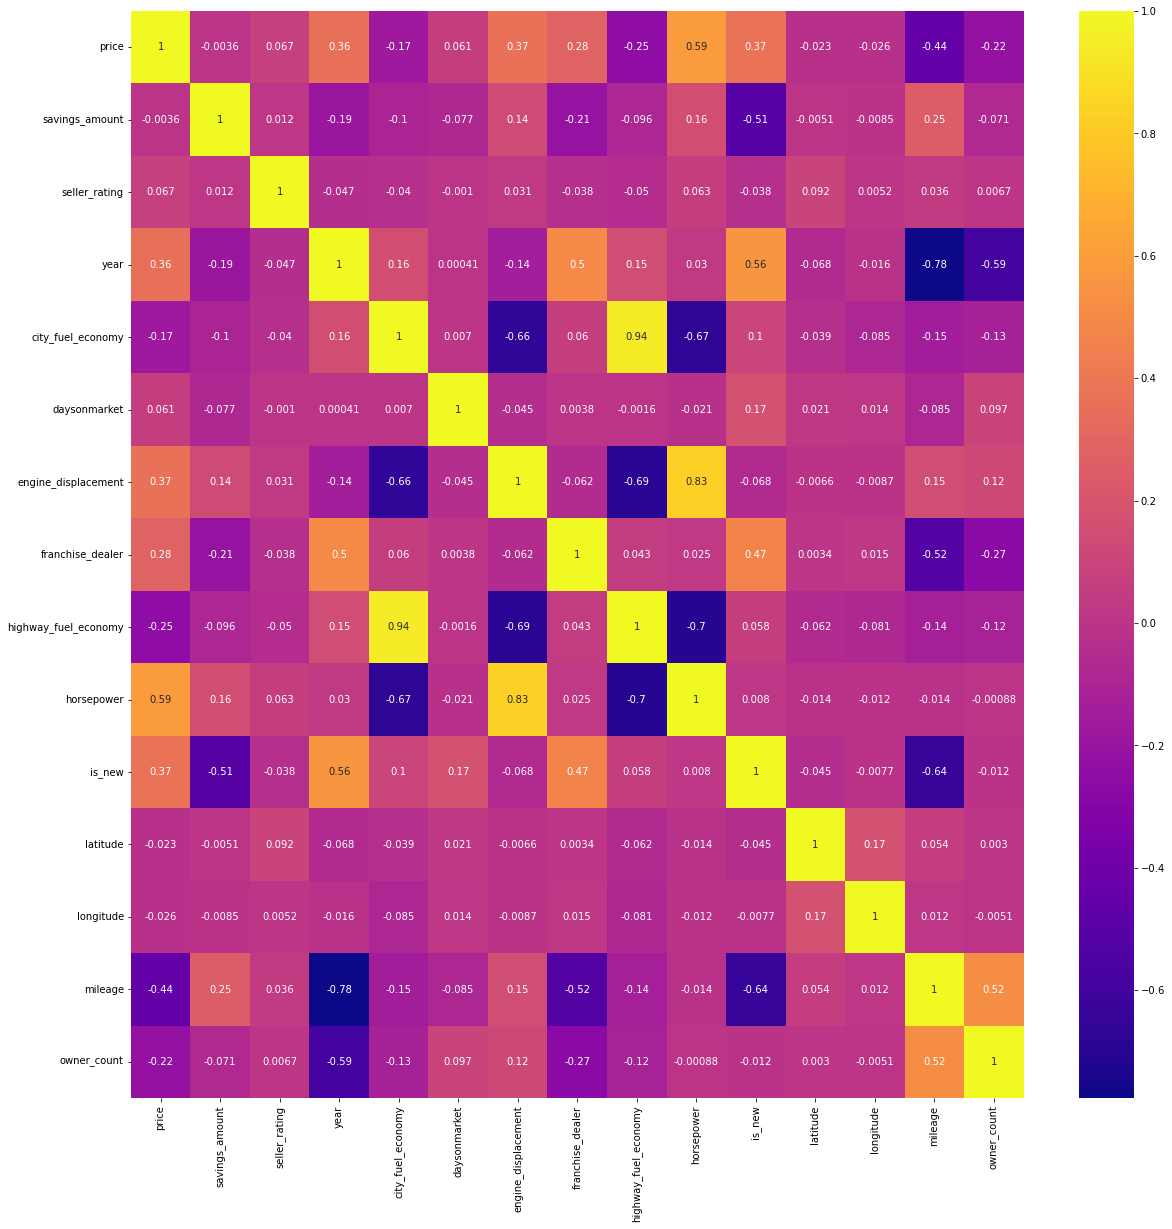

In [21]:
# example of a better corr matrix
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_num.corr(), cmap="plasma", annot=True, ax=ax);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

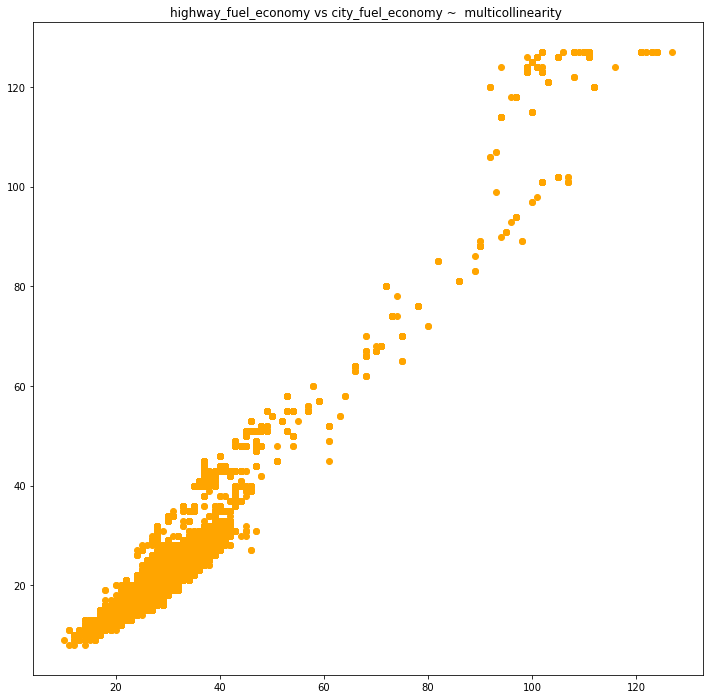

In [27]:
plt.figure(figsize=(12,12))

plt.scatter(df_num.highway_fuel_economy,df_num.city_fuel_economy,color='orange')
plt.title('highway_fuel_economy vs city_fuel_economy ~  multicollinearity ');



### Correlation and Multicollinearity
We notice that some of the variables are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the [***seaborn pairplot***](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function.

> What do you notice?

> Almost all correlations are positive, somewhat normal distributions, etc.

In [89]:
# close-up on correlations with Price, what do you think? 
df_num.corr()['price']

price                   1.000000
savings_amount         -0.003585
seller_rating           0.066876
year                    0.359798
city_fuel_economy      -0.171204
daysonmarket            0.060551
engine_displacement     0.366938
franchise_dealer        0.280687
highway_fuel_economy   -0.246068
horsepower              0.586959
is_new                  0.374732
latitude               -0.023490
longitude              -0.026367
mileage                -0.443932
owner_count            -0.219786
Name: price, dtype: float64

### Pairplot Map

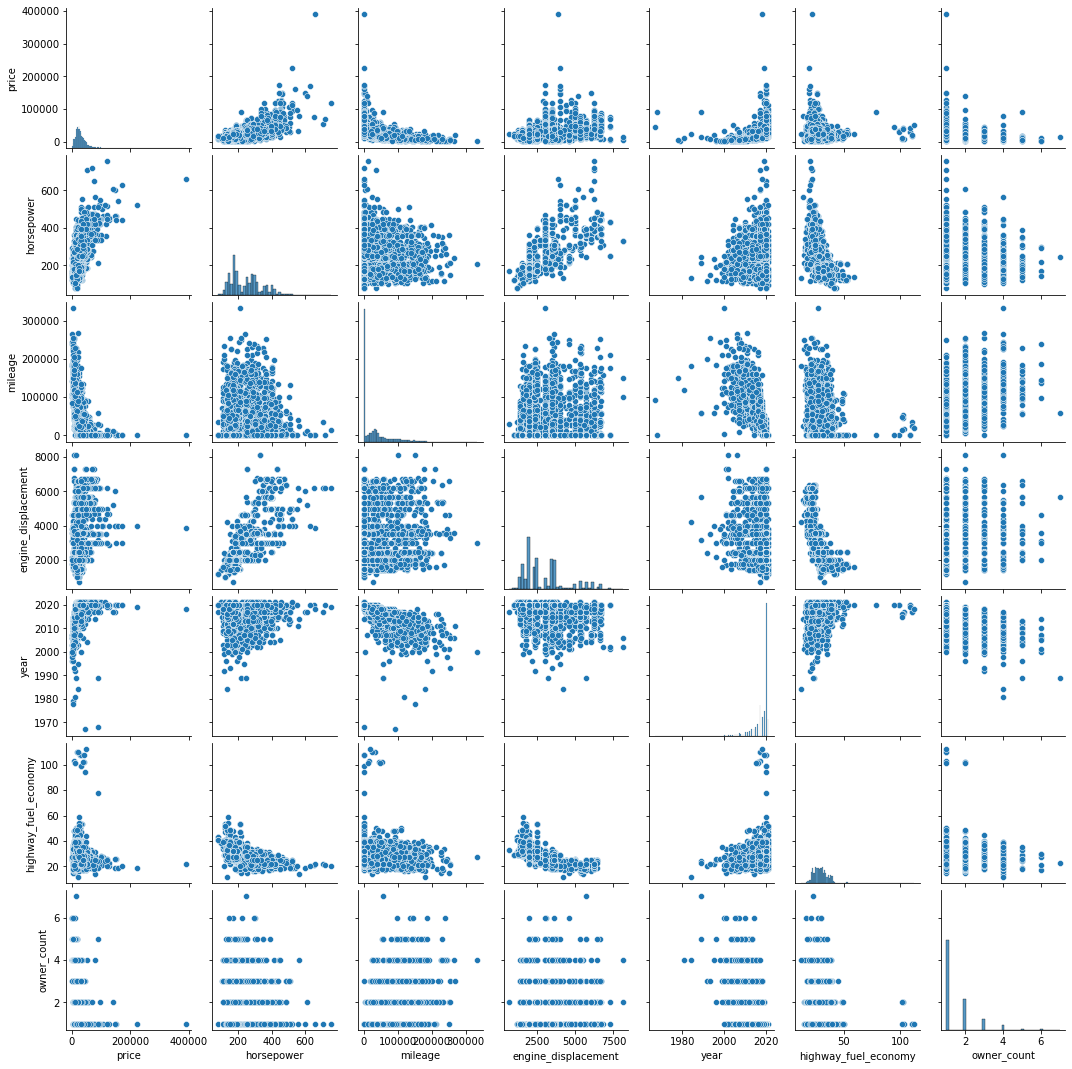

In [90]:
# Warning, takes 2 mins to run .. 
df_samp=df_num[['price','horsepower','mileage','engine_displacement','year','highway_fuel_economy','owner_count']].sample(5000,random_state=123)
g=sns.pairplot(df_samp,kind="scatter");
g.fig.set_size_inches(15,15)


In [91]:
### BTW, Do Leverage stackoverflow, etc

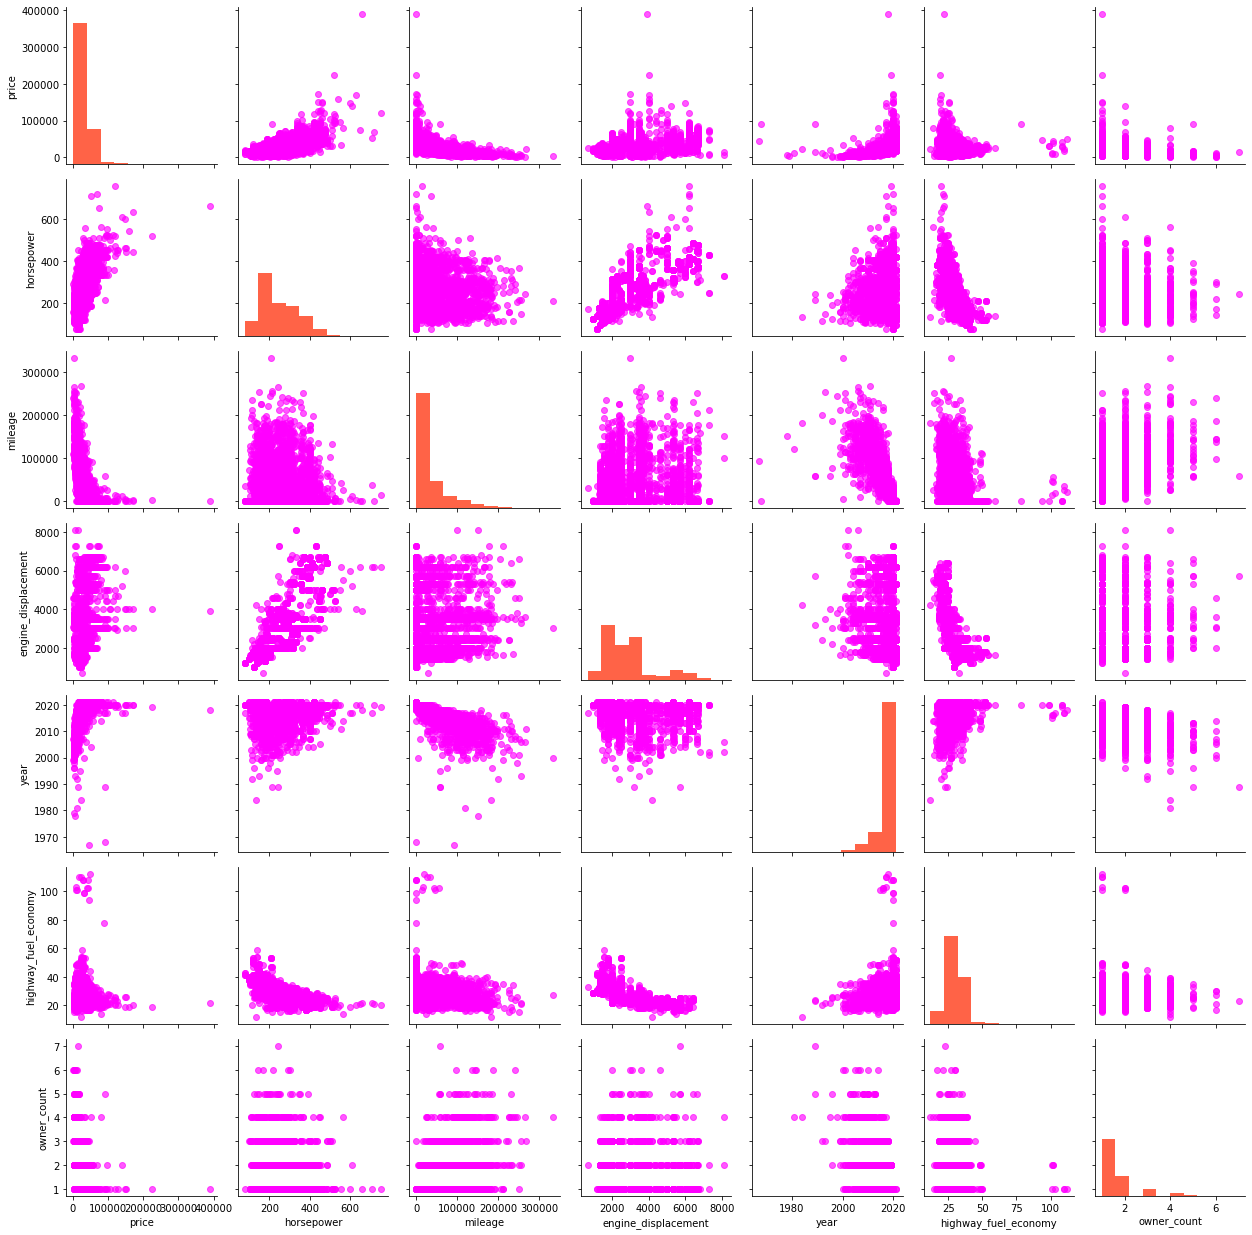

In [92]:
#src : https://stackoverflow.com/questions/59631092/seaborn-pairplot-changing-the-color-of-each-graph

colors = ['tomato']*7+['magenta']*50
colors=iter(colors)



def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs,alpha=.65)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)


g = sns.PairGrid(df_samp)
g.map_diag(my_hist)
g.map_offdiag(my_scatter);

### Ordinary Least Squares Regression with Statsmodels
Let's jump into some modeling  

#### Statsmodels
We are going to use the [**`statsmodels`**](http://statsmodels.sourceforge.net/) library first.  `statsmodels` is a Python package for implementing [**linear models**](https://en.wikipedia.org/wiki/Linear_model), of which **Linear Regression** is one.  It has a bunch of nice features for evaluating and executing such models.  Essentially, a linear model is one that is a **linear function of the parameters**.  

#### Modeling with Statsmodels
There are 2 main ways you can generate models with stats models:
- Via the `statsmodels.api` package
- Via the `statsmodels.formula.api` package

For both approaches, you'll need somewhere to use the R formula style syntax for defining the relationship between target variable and feature variables in your model.  ***Statsmodels*** uses [***patsy***](http://patsy.readthedocs.org/en/latest/) to convert this syntax into the proper data matrices for input into its linear models under the covers. 

Here we'll just start by defining a regression model that takes as its inputs each of the *14* predictor variables.  The other parameter of course is the data that the model is to be built from, our pandas dataframe.

This first model fitting is done for you, it fits a multiple linear regression model of the following form (notice the use of [MathJax](https://www.mathjax.org/) for rendering such lovely math equations in markdown):

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 +\beta_7X_7 + \beta_8X_8 + \beta_9X_9 + \beta_10X_{10} + \beta_11X_{11} + \beta_12X_{12} + \beta_13X_{13}
$$

##### `statsmodels.api`
To use this method, you need to generate a **matrix** of **features**, **`X`** and a **vector** of **targets**, **`y`** where each row represents a single **observation**.  In statsmodels, you can do this with a call to **`patsy.dmatrices`**:


In [15]:
# Create your feature matrix (X) and target vector (y)

y, X = patsy.dmatrices('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:35:54   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### `statsmodels.formula.api`
The formula approach handles the creation of the `X` and `y` matrices internally, so all you have to do is supply the R formula for your model when you create your `ols` object.  

**NOTE:** We'll use this for the remainder of these exercises


In [16]:
# Define the model
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:39:36   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Statistics
From this we get a handful of useful statistics describing our regression.We will focus on the ***R<sup>2</sup>*** values and the middle table here.

$$R^2 = 1- (SSE/SST) $$ 

Where: 
$$ SSE= \sum_{s=i}(y_i-\hat{y}_i)^2$$ 

$$ SST= \sum_{s=i}(y_i-\bar{y})^2$$ 

<img src="imgs/r_2.png" />

***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is often a better measure of model efficacy. We will want to use both ***R<sup>2</sup>*** and ***Adjusted R<sup>2</sup>*** 

<img src="imgs/adjusted_r.png" />

The middle table provides the **coefficients** that our regression has found, along with the **standard error** for each coefficient. This defines our model, aka these are the model parameters that our algorithm was seeking to determine.  

The **P>|t|** field associated with the T-score represents the probability of finding a t-score if the actual value of the coefficient were 0. In other words, if we had a coefficient whose true value should be 0 (aka the predictor has no impact on the response) then this P-value is the probability of finding such a coefficient value in our regression by random chance. In essence, it measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.

As we go along, we will discuss how a statistician might proceed with modeling vs how a die-hard machine learner might approach things,  Ultimately, you may want to try both approaches.  Here we'll start off with a statisitical approach. 

 TBD
[What is a baseline model?](https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning)

### Step 5) Impute missing values

In [17]:
df_num.owner_count.value_counts()

1.0     73007
2.0     25059
3.0      8612
4.0      2957
5.0      1080
6.0       409
7.0       151
8.0        70
9.0        31
10.0       15
11.0        4
13.0        2
19.0        1
14.0        1
12.0        1
15.0        1
Name: owner_count, dtype: int64

In [96]:
df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


#### First,  Let's think about  Missingness
& why data might be missing the 1st place 

In [97]:
df_num['owner_count_missing']=df_num['owner_count'].apply(lambda x: 1 if pd.isnull(x) else 0)

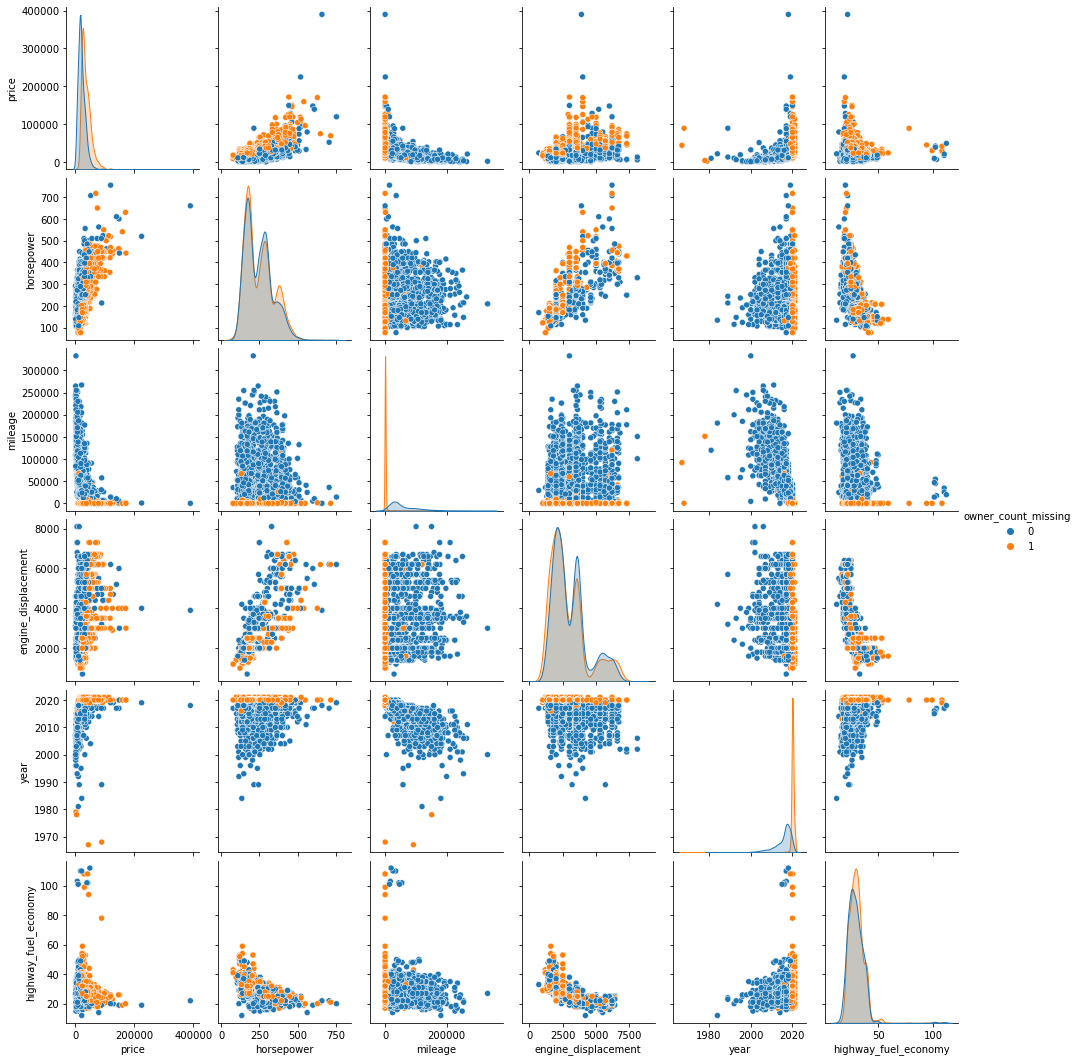

In [98]:

df_num['owner_count_missing']=df_num['owner_count'].apply(lambda x: 1 if pd.isnull(x) else 0)

# takes a few secs to run, 
df_samp=df_num[['price','horsepower','mileage','engine_displacement','year','highway_fuel_economy','owner_count_missing']].sample(5000,random_state=123)
g=sns.pairplot(df_samp,kind="scatter",hue='owner_count_missing');
g.fig.set_size_inches(15,15)

In [99]:
#### quick test ..  Is Owner, count .. 

test=df_num[df_num.owner_count.isnull()]
test.is_new.value_counts()

True     110132
False      3466
Name: is_new, dtype: int64

In [100]:
df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,owner_count_missing
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000,224999.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370,0.504882
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871,0.499977
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,0.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,0.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000,1.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,1.000000


In [18]:
df_impute=df_num.copy()
df_impute['owner_count']=df_impute[['owner_count','year']].groupby('year').transform(lambda x:x.fillna(x.median()))
df_impute.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,224742.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.266784
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.705420
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,1.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [19]:
# .401 --> .553 for imputation of owner count
lm2 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.671e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:50:59   Log-Likelihood:            -1.9044e+06
No. Observations:              175343   AIC:                         3.809e+06
Df Residuals:                  175329   BIC:                         3.809e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -7451.9895    536.498    -13.890      0.000   -8503.513   -6400.466
franchise_dealer[T.True]  1355.9764     91.723     14.783      0.000    1176.201    1535.752
is_new[T.True]            7560.0756     94.707     79.826      0.000    7374.452    7745.699
city_fuel_economy          557.9597     11.854     47.068      0.000     534.726     581.194
daysonmarket                 2.1322      0.292      7.299      0.000       1.560       2.705
engine_displacement         -3.0670      0.048    -63.625      0.000      -3.161      -2.972
highway_fuel_economy      -530.7644     12.686    -41.839      0.000    -555.629    -505.900
horsepower                 154.3327      0.690    223.688      0.000     152.980     155.685
latitude                    24.8465      6.244      3.980      0.000      12.609      37.084
longitude                  -13.9073      2.205     -6.307      0.000     -18.229      -9.586
mileage                     -0.1153      0.001   -101.213      0.000      -0.118      -0.113
owner_count               -546.2932     56.544     -9.661      0.000    -657.119    -435.468
savings_amount               1.6914      0.036     46.533      0.000       1.620       1.763
seller_rating             1568.5140     59.433     26.391      0.000    1452.027    1685.001
==============================================================================
Omnibus:                   625768.096   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1246542668886.421
Skew:                          71.335   Prob(JB):                         0.00
Kurtosis:                   13064.380   Cond. No.                     9.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Warm-up Exercise
(we'll do together) 

What other features could benefit from imputation of missing values?  
Can you impute in a smart way using the groupby function (note that we included 
some features : 'model_name','make_name','engine_type','dealer_zip') that we can use for the groupby. 

* Impute predictive feature values & confirm performance improvement on an iterative basis.
   Only if R^2 reflects improvement (or stays the same) , should the imputed version be retained

**Challenge** : create a function for imputation.  Perform imputation & performance improvement confirmation via a loop 

In [20]:
df_impute=df_impute.join(df[["dealer_zip","model_name","engine_type","make_name"]])

In [21]:
def impute_n_check(df,column):
    if column=='mileage':
        df[column]=df[[column,"dealer_zip","year"]].groupby(["dealer_zip","year"]).transform(lambda x: x.fillna(x.median()))
    else:
        df[column]=df[[column,"model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.median()))
    model = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)
    fit = model.fit()
    print(fit.rsquared)
    print('\n')
    return df,fit.rsquared
   
# warning : about 2 mins to 
cols_to_impute=['horsepower','city_fuel_economy','engine_displacement','mileage','highway_fuel_economy',]


for col in cols_to_impute:
    print(col)
    #print(impute_n_check(df_impute,col)[1])
    # update the imputed dataframe 
    df_impute=impute_n_check(df_impute,col)[0]

horsepower
0.553294060166547


city_fuel_economy
0.553294060166547


engine_displacement
0.5536715944066274


mileage
0.5564313159906635


highway_fuel_economy
0.5659150982177004




In [22]:
df_impute.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,211533.000000,224999.000000,217491.000000,211533.000000,217491.000000,224999.000000,224999.000000,2.232820e+05,224742.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.212267,75.668630,2963.522629,29.025020,247.962603,36.979442,-90.665961,3.006871e+04,1.266784
std,1.970403e+04,1063.530557,0.512164,4.129025,6.490372,109.152441,1339.752673,6.406091,90.105223,4.986730,13.907090,4.506642e+04,0.705420
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,24.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,28.000000,245.000000,37.818500,-87.276400,4.957500e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.202200e+04,1.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,107.000000,2976.000000,8400.000000,93.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [23]:
# generically imputing data did not work well for me ,
df_impute=df_impute.dropna()

In [107]:
#  We could do this .. 


# COLS_TO_IMPUTE=['city_fuel_economy', 'engine_displacement','seller_rating','savings_amount','owner_count','mileage','latitude', 'longitude',
#  'highway_fuel_economy', 'horsepower', 'is_new','franchise_dealer','year']



# for col in COLS_TO_IMPUTE: 
#     df_impute[col] = df_impute[col].fillna(df[col].median())
    

    
# But filling arbitrarirly can make the score go down, 
    

In [24]:
# 0.553 --> .566

# Capture the latest with a new fit! 
lm3 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit3 = lm3.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 2.079e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:56:48   Log-Likelihood:            -2.2495e+06
No. Observations:              207294   AIC:                         4.499e+06
Df Residuals:                  207280   BIC:                         4.499e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8546.0871    482.546    -17.710      0.000   -9491.866   -7600.308
franchise_dealer[T.True]  1447.7214     84.857     17.061      0.000    1281.403    1614.040
is_new[T.True]            7275.5338     86.005     84.594      0.000    7106.965    7444.102
city_fuel_economy          563.5759     10.799     52.190      0.000     542.411     584.741
daysonmarket                 2.8035      0.264     10.624      0.000       2.286       3.321
engine_displacement         -3.4984      0.043    -81.564      0.000      -3.583      -3.414
highway_fuel_economy      -521.5835     11.448    -45.560      0.000    -544.022    -499.145
horsepower                 160.9941      0.618    260.597      0.000     159.783     162.205
latitude                    26.9703      5.662      4.764      0.000      15.873      38.067
longitude                  -15.1257      2.017     -7.499      0.000     -19.079     -11.173
mileage                     -0.1155      0.001   -113.380      0.000      -0.118      -0.114
owner_count               -434.1285     50.496     -8.597      0.000    -533.099    -335.158
savings_amount               1.6902      0.033     51.751      0.000       1.626       1.754
seller_rating             1578.9892     54.076     29.200      0.000    1473.003    1684.976
==============================================================================
Omnibus:                   709867.241   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1140860340961.638
Skew:                          62.955   Prob(JB):                         0.00
Kurtosis:                   11495.180   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



### Plotting Residuals
let's take a quick look at a plot of our residuals *(actual value - predicted value)* with this model.  We do this because in a good model we essentially want our errors to be random.  If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

Take a look [here](https://analyse-it.com/docs/user-guide/fit-model/linear/residual-plot#:~:text=A%20residual%20plot%20shows%20the,band%20around%20the%20identity%20line) for an ideal residual plot

In [109]:
from scipy import stats
def diagnostic_plot(x,y,model):
    plt.figure(figsize=(12,6))
    
    try:
        pred=model.predict()
        res=model.resid
    except: 
        pred=model.predict(X)
        res=y-pred
        

    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res,alpha=.5)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm",plot=plt)
    plt.title("Normal Q-Q plot")

#### Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

### Linear Regression Assumption #2 :   The error terms are normally distributed and zero population mean

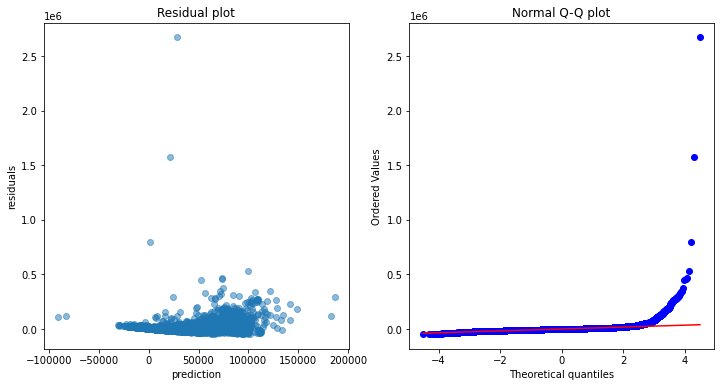

In [110]:
X=df_impute.drop(columns='price',axis=1)
y=df_impute.price
diagnostic_plot(X,y,fit3)

### Step 6) Drop Anomalous Data

In [25]:
### Remove significant outliers : 

df_impute.sort_values(by='price').tail(10)[['price','make_name','model_name','year']]

,price,make_name,model_name,year
vin,,,,
SCAFK4C05LU200593,450450.0,Rolls-Royce,Ghost,2020
ZFF90HLA3L0251028,470000.0,Ferrari,488,2020
ZFF90HLA0K0242740,479900.0,Ferrari,488,2019
WP0AC2999VS375762,499000.0,Porsche,911,1997
JTHHX8BH7C1000123,529000.0,Lexus,LFA,2012
SCA687S59KU104736,544500.0,Rolls-Royce,Phantom,2019
2FAGP9DW3LH100113,626340.0,Ford,GT,2020
1N4AL21E87N452332,799900.0,Nissan,Altima,2007
2C4RDGEGXHR681294,1599500.0,Dodge,Grand Caravan,2017


In [26]:
df_impute=df_impute[df_impute.price<625000]

In [27]:
# 0.566 --> .659

# Dropping anomalous .. 
lm4 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit4 = lm4.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.083e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        10:01:25   Log-Likelihood:            -2.2086e+06
No. Observations:              207290   AIC:                         4.417e+06
Df Residuals:                  207276   BIC:                         4.417e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8565.3704    396.204    -21.619      0.000   -9341.920   -7788.821
franchise_dealer[T.True]  1478.3728     69.675     21.218      0.000    1341.812    1614.933
is_new[T.True]            7343.0764     70.617    103.985      0.000    7204.669    7481.484
city_fuel_economy          564.0479      8.866     63.616      0.000     546.670     581.426
daysonmarket                 2.8841      0.217     13.312      0.000       2.459       3.309
engine_displacement         -3.4764      0.035    -98.704      0.000      -3.545      -3.407
highway_fuel_economy      -520.0969      9.400    -55.330      0.000    -538.520    -501.673
horsepower                 160.5642      0.507    316.493      0.000     159.570     161.559
latitude                    23.7521      4.649      5.109      0.000      14.641      32.864
longitude                  -15.6921      1.656     -9.475      0.000     -18.938     -12.446
mileage                     -0.1158      0.001   -138.394      0.000      -0.117      -0.114
owner_count               -410.2221     41.461     -9.894      0.000    -491.485    -328.959
savings_amount               1.7296      0.027     64.496      0.000       1.677       1.782
seller_rating             1564.9870     44.401     35.247      0.000    1477.963    1652.011
==============================================================================
Omnibus:                   296470.352   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        343288887.250
Skew:                           8.064   Prob(JB):                         0.00
Kurtosis:                     201.710   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

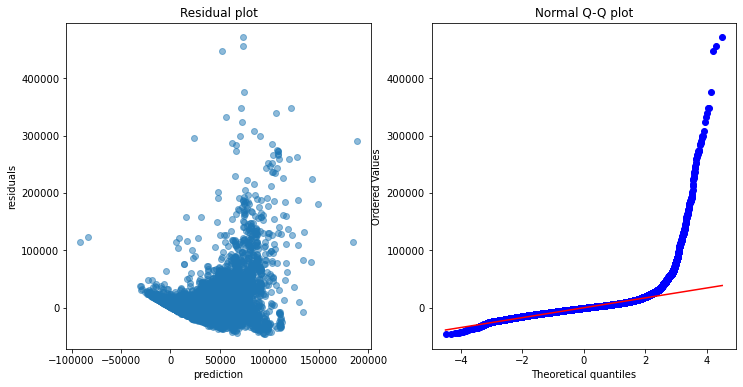

In [114]:
y=df_impute.price
X=df_impute.drop(columns=['price'],axis=1)
diagnostic_plot(X,y,fit4);

### Step 7) Try a Log Transformation

If data follows a log-normal distribution or approximately so, then the log-transformed data will be more similar to a 
normal distribution

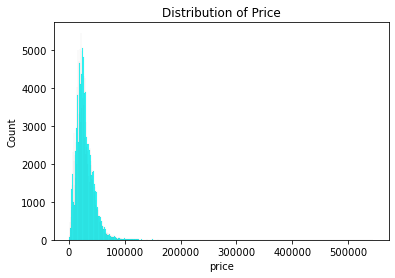

In [28]:
sns.histplot(df_impute['price'],color='cyan',alpha=.8);
plt.title('Distribution of Price');

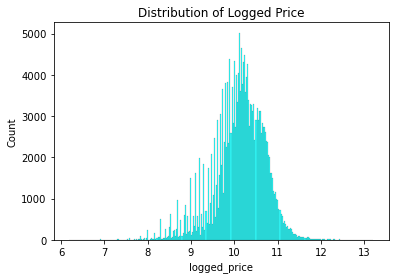

In [30]:
# Try log transform of response variable : 
df_impute=df_impute.copy()
df_impute['logged_price']=np.log(df_impute.price)
sns.histplot(df_impute['logged_price'],color='cyan',alpha=.8);
plt.title('Distribution of Logged Price');

In [31]:
## 0.659 --> .831

## try using log Transformed version of Price 
lm5 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit5 = lm5.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 7.832e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        10:05:20   Log-Likelihood:                 1319.7
No. Observations:              207290   AIC:                            -2611.
Df Residuals:                  207276   BIC:                            -2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.3610      0.009   1007.810      0.000       9.343       9.379
franchise_dealer[T.True]     0.1012      0.002     61.940      0.000       0.098       0.104
is_new[T.True]               0.1191      0.002     71.952      0.000       0.116       0.122
city_fuel_economy            0.0206      0.000     99.037      0.000       0.020       0.021
daysonmarket             -7.027e-05   5.08e-06    -13.836      0.000   -8.02e-05   -6.03e-05
engine_displacement      -6.541e-05   8.26e-07    -79.223      0.000    -6.7e-05   -6.38e-05
highway_fuel_economy        -0.0229      0.000   -103.773      0.000      -0.023      -0.022
horsepower                   0.0042   1.19e-05    349.985      0.000       0.004       0.004
latitude                     0.0013      0.000     11.760      0.000       0.001       0.001
longitude                   -0.0006   3.88e-05    -15.960      0.000      -0.001      -0.001
mileage                  -7.173e-06   1.96e-08   -365.733      0.000   -7.21e-06   -7.13e-06
owner_count                 -0.0741      0.001    -76.218      0.000      -0.076      -0.072
savings_amount            3.927e-05   6.29e-07     62.462      0.000     3.8e-05    4.05e-05
seller_rating                0.0429      0.001     41.248      0.000       0.041       0.045
==============================================================================
Omnibus:                    41090.542   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297421.761
Skew:                           0.169   Prob(JB):                         0.00
Kurtosis:                      15.252   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

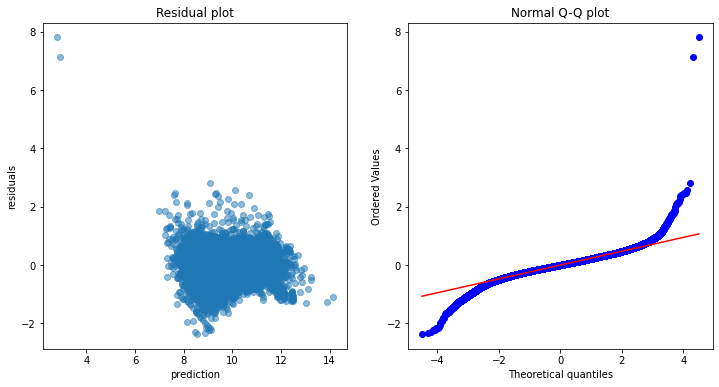

In [118]:
y=df_impute.logged_price
X=df_impute.drop(columns=['price','logged_price'],axis=1)
diagnostic_plot(X,y,fit5)

In [119]:
# interesting!  both have super high mileage , ..  Let's leave these for now, but hold this thought
res=fit5.resid
df_impute.iloc[np.where(res>6)]

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,owner_count_missing,dealer_zip,model_name,engine_type,make_name,logged_price
vin,,,,,,,,,,,,,,,,,,,,,
KMHH35LE6LU131604,22907.0,0,3.500000,2020,25.0,114,2000.0,True,32.0,161.0,True,35.2449,-114.038,999999.0,1.0,1,86409,Elantra GT,I4,Hyundai,10.039198
1GCRYDED8LZ312540,39523.0,0,3.818182,2020,16.0,63,5300.0,True,22.0,355.0,True,43.6195,-116.334,1111111.0,1.0,1,83713,Silverado 1500,V8,Chevrolet,10.584638


In [120]:
df_impute.sort_values(by='mileage').tail()[['mileage','price']]

,mileage,price
vin,,
NM0LS7AN2CT108243,392650.0,6995.0
3GCPKSE77DG374634,397322.0,12995.0
JTHBJ46G982187965,399496.0,6259.0
KMHH35LE6LU131604,999999.0,22907.0
1GCRYDED8LZ312540,1111111.0,39523.0


In [32]:
df_impute=df_impute[df_impute.mileage<500000]

In [33]:
### .831 --> .832

## try using log Transformed version of Price 
lm6 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 7.921e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        10:08:12   Log-Likelihood:                 2303.3
No. Observations:              207288   AIC:                            -4579.
Df Residuals:                  207274   BIC:                            -4435.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.3677      0.009   1013.195      0.000       9.350       9.386
franchise_dealer[T.True]     0.0993      0.002     61.033      0.000       0.096       0.102
is_new[T.True]               0.1147      0.002     69.494      0.000       0.111       0.118
city_fuel_economy            0.0206      0.000     99.616      0.000       0.020       0.021
daysonmarket             -7.021e-05   5.06e-06    -13.889      0.000   -8.01e-05   -6.03e-05
engine_displacement      -6.482e-05   8.22e-07    -78.873      0.000   -6.64e-05   -6.32e-05
highway_fuel_economy        -0.0230      0.000   -104.686      0.000      -0.023      -0.023
horsepower                   0.0042   1.18e-05    350.650      0.000       0.004       0.004
latitude                     0.0013      0.000     11.834      0.000       0.001       0.001
longitude                   -0.0006   3.86e-05    -15.781      0.000      -0.001      -0.001
mileage                  -7.279e-06   1.97e-08   -370.155      0.000   -7.32e-06   -7.24e-06
owner_count                 -0.0717      0.001    -73.955      0.000      -0.074      -0.070
savings_amount            3.897e-05   6.26e-07     62.271      0.000    3.77e-05    4.02e-05
seller_rating                0.0432      0.001     41.690      0.000       0.041       0.045
==============================================================================
Omnibus:                    16414.048   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94671.313
Skew:                          -0.113   Prob(JB):                         0.00
Kurtosis:                       6.303   Cond. No.                     9.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

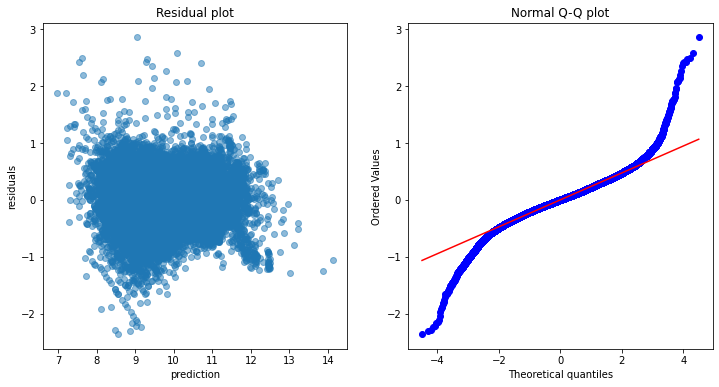

In [123]:
y=df_impute.logged_price
X=df_impute.drop(columns=['price','logged_price'],axis=1)
diagnostic_plot(X,y,fit6)

### Step #7   Bring in Categorical variables & Feature Engineering

In [34]:
## Let's start off by only using numerical vals 
cat_cols=df.dtypes[df.dtypes=='object'].index
df_cat=df[cat_cols]

for i in df_cat.columns:
    print(i)

dealer_zip
engine_cylinders
engine_type
franchise_make
fuel_type
has_accidents
is_oemcpo
length
listed_date
make_name
maximum_seating
model_name
power
salvage
torque
transmission
wheel_system
wheel_system_display
wheelbase
width


#### Some Basic Feature Engineering

In [125]:
### Let's create torque feature that makes more sense for our model .. 
df_cat.torque.value_counts().head()

383 lb-ft @ 4,100 RPM    6627
400 lb-ft @ 4,500 RPM    4976
410 lb-ft @ 3,950 RPM    4182
148 lb-ft @ 200 RPM      4056
132 lb-ft @ 4,500 RPM    3960
Name: torque, dtype: int64

In [36]:
def normalize_torque(x):
    try:
        lb_ft=int(x.split()[0])
        rpm=int(x.split()[3].replace(',',''))
        return lb_ft/rpm
    except:
        return np.nan   
    

In [37]:
df_impute=df_impute.join(df['torque'])

In [38]:
df_impute['torque_norm']=df_impute['torque'].apply(normalize_torque)
df_impute['torque_norm']=df_impute['torque_norm'].fillna(df_impute['torque_norm'].median())

In [39]:
df_comb=df_impute.join(df[['maximum_seating']])

In [130]:
df_comb.maximum_seating.value_counts(dropna=False)

5 seats     135999
7 seats      22310
6 seats      17621
8 seats      14851
NaN           6047
4 seats       5934
2 seats       2467
3 seats       1369
15 seats       333
9 seats        243
10 seats        42
--              39
12 seats        33
Name: maximum_seating, dtype: int64

In [40]:
df_comb.maximum_seating=df_comb.maximum_seating.replace('--',None)
df_comb.maximum_seating=df_comb.maximum_seating.fillna('5 seats')

df_comb.maximum_seating=df_comb.maximum_seating.apply(lambda x: x.split()[0]).astype(int)

In [41]:
# .832 >> .834
# testing engineered features
lm6 = smf.ols('logged_price~torque_norm+maximum_seating+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 6.921e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        10:12:54   Log-Likelihood:                 3004.7
No. Observations:              207288   AIC:                            -5977.
Df Residuals:                  207272   BIC:                            -5813.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.2483      0.010    947.635      0.000       9.229       9.267
franchise_dealer[T.True]     0.0974      0.002     60.081      0.000       0.094       0.101
is_new[T.True]               0.1149      0.002     69.812      0.000       0.112       0.118
torque_norm                  0.0996      0.005     19.220      0.000       0.089       0.110
maximum_seating              0.0164      0.000     32.843      0.000       0.015       0.017
city_fuel_economy            0.0202      0.000     97.636      0.000       0.020       0.021
daysonmarket             -7.141e-05   5.04e-06    -14.163      0.000   -8.13e-05   -6.15e-05
engine_displacement      -6.515e-05   8.42e-07    -77.382      0.000   -6.68e-05   -6.35e-05
highway_fuel_economy        -0.0217      0.000    -97.757      0.000      -0.022      -0.021
horsepower                   0.0041   1.19e-05    346.599      0.000       0.004       0.004
latitude                     0.0013      0.000     12.216      0.000       0.001       0.002
longitude                   -0.0006   3.85e-05    -15.475      0.000      -0.001      -0.001
mileage                  -7.295e-06   1.96e-08   -371.587      0.000   -7.33e-06   -7.26e-06
owner_count                 -0.0688      0.001    -70.946      0.000      -0.071      -0.067
savings_amount            3.974e-05   6.25e-07     63.626      0.000    3.85e-05     4.1e-05
seller_rating                0.0430      0.001     41.603      0.000       0.041       0.045
==============================================================================
Omnibus:                    16688.385   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100644.598
Skew:                          -0.084   Prob(JB):                         0.00
Kurtosis:                       6.409   Cond. No.                     9.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Create Dummy Variables

A note about **Dummy Variables** in this case . .

In [42]:
sorted(df_comb['make_name'].unique())[:5]

['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW']

In [45]:
df_comb.shape

(207288, 23)

In [43]:
df_comb['make_name'].head(10)

vin
1GAZG1FGXF1182508    Chevrolet
JTJBM7FX0J5202882        Lexus
1FM5K8HC3LGA01518         Ford
YV4BR0DL3M1675891        Volvo
JM3KFBEY5K0697516        Mazda
1G1ZB5ST3GF262598    Chevrolet
19UDE2F73KA013861        Acura
1FTEW1EPXLKE72795         Ford
2HKRW2H89LH678524        Honda
1FTFW1EF7FFA21266         Ford
Name: make_name, dtype: object

In [135]:
### Note: the dummy variable trap

In [136]:
df_make_dummies=pd.get_dummies(df_comb.make_name,drop_first=True)
df_make_dummies.head()

,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Fisker,Ford,GMC,Genesis,Honda,Hummer,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Lexus,Lincoln,Lotus,MINI,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,RAM,Rolls-Royce,SRT,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JTJBM7FX0J5202882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1FM5K8HC3LGA01518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YV4BR0DL3M1675891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
JM3KFBEY5K0697516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# 0.834 --> .869

# Testing with Dummy Make variable!
lm7 = smf.ols('logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit7 = lm7.fit()

# Print summary statistics of the model's performance
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.986e+04
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        10:15:46   Log-Likelihood:                 27511.
No. Observations:              207288   AIC:                        -5.488e+04
Df Residuals:                  207218   BIC:                        -5.417e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.4805      0.010    939.568      0.000       9.461       9.500
make_name[T.Alfa Romeo]       -0.0190      0.012     -1.526      0.127      -0.043       0.005
make_name[T.Aston Martin]      0.6100      0.029     20.783      0.000       0.553       0.668
make_name[T.Audi]              0.1317      0.006     21.244      0.000       0.120       0.144
make_name[T.BMW]               0.0866      0.006     15.102      0.000       0.075       0.098
make_name[T.Bentley]           0.2734      0.027     10.150      0.000       0.221       0.326
make_name[T.Buick]            -0.1522      0.006    -27.343      0.000      -0.163      -0.141
make_name[T.Cadillac]          0.0312      0.006      5.369      0.000       0.020       0.043
make_name[T.Chevrolet]        -0.1801      0.005    -37.997      0.000      -0.189      -0.171
make_name[T.Chrysler]         -0.2524      0.006    -40.807      0.000      -0.265      -0.240
make_name[T.Dodge]            -0.3400      0.005    -64.859      0.000      -0.350      -0.330
make_name[T.FIAT]             -0.2247      0.016    -13.725      0.000      -0.257      -0.193
make_name[T.Ferrari]           0.5289      0.028     18.559      0.000       0.473       0.585
make_name[T.Fisker]           -0.2100      0.123     -1.714      0.087      -0.450       0.030
make_name[T.Ford]             -0.2164      0.005    -46.277      0.000      -0.226      -0.207
make_name[T.GMC]              -0.1170      0.005    -22.306      0.000      -0.127      -0.107
make_name[T.Genesis]           0.0008      0.014      0.062      0.951      -0.026       0.028
make_name[T.Honda]            -0.0920      0.005    -18.965      0.000      -0.101      -0.082
make_name[T.Hummer]            0.1769      0.048      3.713      0.000       0.084       0.270
make_name[T.Hyundai]          -0.1510      0.005    -29.912      0.000      -0.161      -0.141
make_name[T.INFINITI]         -0.0695      0.006    -10.778      0.000      -0.082      -0.057
make_name[T.Isuzu]            -0.6981      0.071     -9.857      0.000      -0.837      -0.559
make_name[T.Jaguar]            0.0945      0.010      9.500      0.000       0.075       0.114
make_name[T.Jeep]             -0.0671      0.005    -13.602      0.000      -0.077      -0.057
make_name[T.Kia]              -0.2320      0.005    -45.083      0.000      -0.242      -0.222
make_name[T.Lamborghini]       0.6520      0.046     14.232      0.000       0.562       0.742
make_name[T.Land Rover]        0.1871      0.008     23.606      0.000       0.172       0.203
make_name[T.Lexus]             0.0963      0.006     16.185      0.000       0.085       0.108
make_name[T.Lincoln]          -0.0514      0.006     -8.172      0.000      -0.064      -0.039
make_name[T.Lotus]             0.5968      

In [47]:
add_cols_to_join=['transmission','wheel_system','fuel_type','has_accidents']
df_comb=df_comb.join(df[add_cols_to_join])

In [48]:
df_comb.has_accidents=df_comb.has_accidents.fillna(False)

### Exercise 
Using your domain knowledge of cars, pick the most valuable categorical features to add to the model. Try as many as you think make sense. 

* Iteratively test the categorical features

*Challenge* : create a function to iteratively test the addition of a new categorical variables.   

*Hint* : You may want to reduce the different types of unique values within a column in order to control the dimensionality.  For example:

```
common_zips=df_comb.dealer_zip.value_counts().index[df_comb.dealer_zip.value_counts()>100]
df_comb['zips_clean']=df_comb.dealer_zip.apply(lambda x:x if x in common_zips else 'Other')
```

In [49]:
# A quick clean of zips . .
common_zips=df_comb.dealer_zip.value_counts().index[df_comb.dealer_zip.value_counts()>100]
df_comb['zips_clean']=df_comb.dealer_zip.apply(lambda x:x if x in common_zips else 'Other')

def categorical_n_check(string,column,df):
    model = smf.ols(string, data=df)
    fit = model.fit()
    print(column)
    print(fit.rsquared)
    print(fit.rsquared_adj)
    print('\n')
    return df_comb,fit.rsquared

In [50]:
# before we run zips .. 
df_comb.zips_clean=df_comb.zips_clean.astype('str')


cats_to_test=['model_name','engine_type','zips_clean','transmission','wheel_system','fuel_type','has_accidents']

# Warning ( this may take some time to run  )
string='logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating'
for col in cats_to_test:
    string+='+' + col
    categorical_n_check(string,col,df_comb)

model_name
0.908196475567878
0.9078242810900399


engine_type
0.9098275166229204
0.9094527243663211


zips_clean
0.9101289799713
0.9096968218876409


transmission
0.9098111747103873
0.9093688059382619


wheel_system
0.9150933794629909
0.9146619130062494


fuel_type
0.9150933794629909
0.9146619130062494


has_accidents
0.9155095967603517
0.9150798121093352




In [142]:
string ='logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+horsepower+is_new+mileage+owner_count+savings_amount+seller_rating+model_name+engine_type+zips_clean+transmission+wheel_system+fuel_type+has_accidents'

In [ ]:
#  .867 -- > .913

lm7 = smf.ols(string, data=df_comb)

# Fit the model
fit7 = lm7.fit()

# Print summary statistics of the model's performance
fit7.summary()


# Regression with sklearn
Statsmodels has decent functionality for linear models, and is great for statistical summaries. But, scikit-learn has more modeling options for all sorts of algorithms as well as data preparation and is growing every day, so we will generally be working with that from here on.

### Regression with sklearn
Before we jump into some of the additional features of sklearn, let's try to repeat what we have so far using sklearn's built in **LinearRegression**.

1st we will have to use some functions to add our categorical dummy variables

In [ ]:
#df_comb.transmission.value_counts()

In [51]:
df_dummies= pd.get_dummies(df_comb[['transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type']],drop_first=True)

### combine with the previous
df_cat_num=df_comb.drop(['longitude','latitude', 'highway_fuel_economy','torque','dealer_zip','transmission','model_name','make_name',
                         'engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)

In [53]:
df_dummies.shape

(207288, 1041)

In [54]:
from sklearn.model_selection import train_test_split

X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
y=df_cat_num.logged_price



In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207288 entries, 1GAZG1FGXF1182508 to 1FMCU9G68LUA82634
Columns: 1055 entries, savings_amount to fuel_type_Hybrid
dtypes: bool(2), float64(7), int64(5), uint8(1041)
memory usage: 234.8+ MB


### Big Machine Learning Idea #1 :  Cross Validation 

The more complex a model is, the more likely it is to overfit, because it learned too much detail in training. This complexity can mean that there are a lot of features, multicollinear features, etc. One way to correct for overfitting is to adjust for these concerns. Strategies for algorithms other than linear regression might be somewhat different, but they will always aim to reduce complexity.

Let's compare the train & validation scores   (we won't want to use test set until the very end) 


https://scikit-learn.org/stable/_images/grid_search_cross_validation.png

In [181]:
cats_to_test=['model_name','zips_clean','transmission','wheel_system','fuel_type','engine_type','make_name'
              ]

In [ ]:
# A couple things to note here, we are finally

In [55]:
# ~ 8 mins to run,
for col in cats_to_test:
    dummies=pd.get_dummies(df_comb[col],drop_first=True)
    df_cat_num=df_cat_num.join(dummies,lsuffix=col)
    X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
    y=df_cat_num.logged_price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
    # Partition remaining data into train/validation for 60, 20, 20 divide|
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)
    
    # Fit the model to the full dataset
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    print(col)
    # Print out the R^2 for the model for the train data
    print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

    # Print out the R^2 for the model for validation  data
    print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))
    print('\n')

model_name
Train R^2:  0.933
Val R^2:  0.928


engine_type
Train R^2:  0.933
Val R^2:  0.928


zips_clean
Train R^2:  0.933
Val R^2: -19914413.179




KeyboardInterrupt: 

In [56]:
def bin_low_frequency(df,col,freq): 
    df=df.copy()
    common_ele =df[col].value_counts().index[df[col].value_counts()>freq]
    df[col]=df[col].apply(lambda x:x if x in common_ele else 'Other')
    return df
    

In [57]:
# Leave out transmission, model_name
cats_to_test =['make_name','zips_clean','wheel_system','fuel_type','engine_type']

In [58]:
for col in cats_to_test: 
    df_comb_cln = bin_low_frequency(df_comb,col,200)

In [59]:
# ~ Try Again ? 
df_cat_num=df_comb.drop(['longitude','latitude', 'highway_fuel_economy','torque','dealer_zip','transmission','model_name','make_name',
                         'engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1)

for col in cats_to_test:
    dummies=pd.get_dummies(df_comb_cln[col],drop_first=True)
    df_cat_num=df_cat_num.join(dummies,lsuffix=col)
    X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
    y=df_cat_num.logged_price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
    # Partition remaining data into train/validation for 60, 20, 20 divide|
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)
    
    # Fit the model to the full dataset
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    print(col)
    # Print out the R^2 for the model for the train data
    print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

    # Print out the R^2 for the model for test data
    print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))
    print('\n')
    

make_name
Train R^2:  0.882
Val R^2:  0.881


zips_clean
Train R^2:  0.883
Val R^2:  0.881


wheel_system
Train R^2:  0.894
Val R^2:  0.892


fuel_type
Train R^2:  0.896
Val R^2:  0.894


engine_type
Train R^2:  0.898
Val R^2:  0.896




#### Repeat Regression with KFold

In [189]:
from sklearn.model_selection import KFold,cross_val_score
# dropping the model_name
df_dummies= pd.get_dummies(df_comb_cln[['make_name','engine_type','zips_clean','wheel_system','fuel_type',]],drop_first=True)
df_cat_num=df_comb_cln.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)

X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
y=df_cat_num.logged_price

# resplit,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Define model
lr_kfold = LinearRegression()

kf = KFold(n_splits=3, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lr_cv = cross_val_score(lr_kfold, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lr_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lr_cv), 2), "+-", np.round(np.std(lr_cv),2))

/var/folders/_c/nj52mks52lq4kgjrpyqd2sx40000gq/T/ipykernel_66224/2831796166.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat_num=df_comb_cln.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)


[0.90055324 0.90044235 0.90268854]
0.9 +- 0.0


### Final Interpretative Model

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))

Train R^2:  0.902
Val R^2:  0.900


In [191]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':lr.coef_,'features':X.columns,'abs_val_coef':np.abs(lr.coef_),'exp_coef':np.exp(lr.coef_)}).sort_values(by='exp_coef')
feat_df.tail(20)

,coef,features,abs_val_coef,exp_coef
109,0.072162,zips_clean_32505,0.072162,1.074830
20,0.097257,make_name_BMW,0.097257,1.102144
61,0.111552,make_name_SRT,0.111552,1.118012
38,0.112327,make_name_Jaguar,0.112327,1.118878
43,0.131040,make_name_Lexus,0.131040,1.140014
19,0.136646,make_name_Audi,0.136646,1.146422
51,0.181191,make_name_Mercedes-Benz,0.181191,1.198644
42,0.181698,make_name_Land Rover,0.181698,1.199252
34,0.202737,make_name_Hummer,0.202737,1.224751
82,0.210257,engine_type_V6 Biodiesel,0.210257,1.233995


#### Feature Interpretation

* We can expect a 277% increase in price for **Ferrari** (compared with *Acura*) 
* We can expect a 273% increase in price for **Rolls Royce** (compared with *Acura*) 
* We can expect a 251% increase in price for **Lamborghini** (compared with *Acura*) 

### Final Check of all Linear Regression Assumptions:

#### Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

#### Assumption #1 : Regression is linear in parameters & correctly specified

Examples :    
 (Good):  $ Y= {\beta_0}+ {\beta_1}X_1+{\beta_2}X_2 +{\epsilon}$   
 (Bad): $ Y= {\beta_0}+ e^{\beta_1}X^{\beta_2}$

#### Assumption #2 : 

Residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean: 



We can check this assumption as follows by plotting our residuals vs $\hat{Y}$:

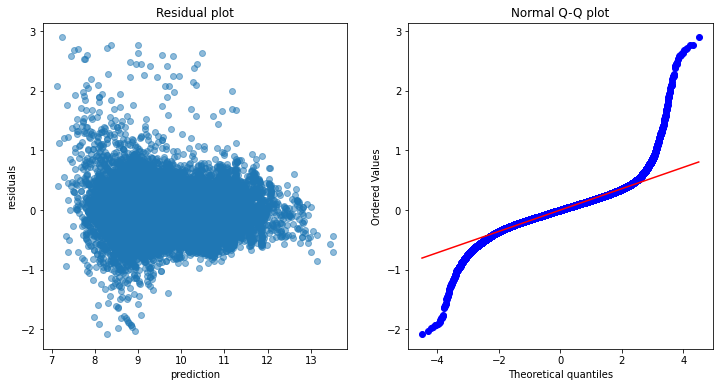

In [159]:
diagnostic_plot(X,y,lr)

#### Assumption #3: 

The error term must have constant variance. Here we see signs of heteroskedasticity.
However, the rule of thumb is: OLS regression isn't too impacted by heteroscedasticity as long as the maximum variance is not greater than 4 times the minimum variance (as in this case).  If the residual variance of your model exceeds this range, we can opt for a Weighted Least Squares model: http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/wls.html

In [100]:
df.listed_date.value_counts()

2020-09-03    5813
2020-09-02    5489
2020-09-04    5377
2020-09-05    5110
2020-08-29    4524
              ... 
2015-12-04       1
2017-05-28       1
2018-04-05       1
2018-05-02       1
2018-10-10       1
Name: listed_date, Length: 1054, dtype: int64

####  Assumption 4: 

Errors are uncorrelated across observations
To check this assumption, let's plot residuals vs. time


In [101]:
df['listed_date'].dtype

dtype('O')

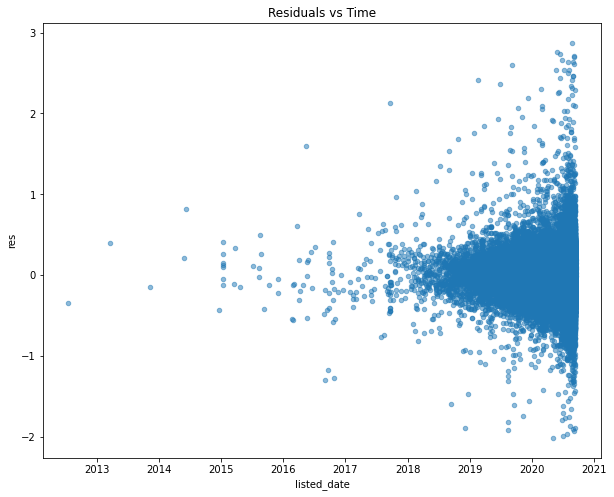

In [102]:
num_4=X.join(df[['listed_date']])
num_4.listed_date=pd.to_datetime(num_4.listed_date)
num_4['res']=y-lr.predict(X)
num_4=num_4[['listed_date','res']].sort_values(by='listed_date')

num_4.plot('listed_date','res',kind='scatter',alpha=.5,figsize=(10,8))
plt.title('Residuals vs Time');

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
###  Other Things to Check, Lasso! 

In [163]:
# standardizing features ~ mean = 0 & std dev = 1
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_val_std=scaler.transform(X_val)


clf = Lasso(alpha=10e-5)
clf.fit(X_train_std, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(clf.score(X_train_std,y_train)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(clf.score(X_val_std,y_val)))

Train R^2:  0.902
Val R^2:  0.900


In [164]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':clf.coef_,'features':X.columns,'abs_val_coef':np.abs(clf.coef_),'exp_coef':np.exp(clf.coef_)}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef,exp_coef
26,-0.052062,make_name_Dodge,0.052062,0.949270
24,-0.054675,make_name_Chevrolet,0.054675,0.946793
86,-0.063520,engine_type_V8,0.063520,0.938455
224,-0.067816,wheel_system_FWD,0.067816,0.934432
30,-0.070152,make_name_Ford,0.070152,0.932252
3,0.104676,city_fuel_economy,0.104676,1.110351
7,-0.126129,highway_fuel_economy,0.126129,0.881501
2,0.189814,year,0.189814,1.209025
12,-0.206039,mileage,0.206039,0.813801
8,0.259329,horsepower,0.259329,1.296060


Feature Interpretation for Lasso Model: 
    
* One unit increase in Horsepower Standard Deviation is associated with a 29.3 % increase in price
* One unit increase in Mileage Standard Deviation is associated with a 81% decrease in price 

##### Pickling for Later
We're going to come back to this dataset!  So let's pickle it away for later...

`sklearn`, `pandas` and `statsmodels` have their own respective methods for "pickling" their objects.

**Pandas:**

To pickle a `pandas.DataFrame` use the [`to_pickle()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.  Use this now to pickle your training data `df` now.

In [167]:
# Pickle your pandas dataframe
df_cat_num.to_pickle('df_cat_num.pkl')

**Statsmodels**

To pickle a statsmodels object us the [`save()`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.save.html#statsmodels.regression.linear_model.OLSResults.save) method.  Use this to pickle your best fit model `fit2` to `survey_sm_model.pkl` now.

In [170]:
# Pickle fit8 to a file 
fit6.save('../models/sm_model_8.pkl')

**sklearn**

Pickle an `sklearn` model to the file `survey_sk_model.pkl` using the `sklearn` replacement for pickle `joblib` as seen [here](http://scikit-learn.org/stable/modules/model_persistence.html).

In [171]:
import joblib
joblib.dump(lr, '../models/sklearn_model_1.pkl')

['../models/sklearn_model_1.pkl']



## What have we done?
- Learned how to use statsmodels with R formula syntax for creating linear models
- Learned how to evaluate models using adjusted R^2
- Understood linear regression in sklearn
- Used seaborn for visualizing relationships in data
- Used pandas for manipulating data as we move through our workflow
- Gotten a peak into a genuine data science workflow
- Seen how curiosity and creativity can yield big gains in a data science modeling pipeline

